In [0]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt 

In [0]:
# dftr=pd.read_csv('drive/My Drive/Sangam_2019_Hackathon_Data.csv')
dftr=pd.read_csv('drive/My Drive/Sangam_2019_Hackathon_Data.csv',parse_dates=['svrtime'],index_col=['device_id','svrtime'])

In [0]:
df=pd.read_csv('drive/My Drive/Sangam_2019_Hackathon_Data.csv')


In [6]:
df.head()

,S.no,device_id,latitude,nso,longitude,ewo,svrtime,timestamp,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm25,pm10,pressure,draft,air_temp,air_speed
0,1,S5,28.4578,N,77.034,E,4/23/2019 19:50,4/19/2023 19:50,41.0,33.2,93.79,0.01,259.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1438.10,1060.04,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,62.0,75.0,86.0,0.0,0.0,0.0,0.0
1,2,S3,28.4579,N,77.034,E,4/23/2019 19:50,4/19/2023 19:50,95.0,33.5,138.48,0.02,261.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1251.97,-5847.98,10.28,50.04,0.30,34210.0,12876.70,5163570.0,30.04,39.99,62.0,77.0,92.0,0.0,0.0,0.0,0.0
2,3,S4,28.4579,N,77.034,E,4/23/2019 19:50,4/19/2023 19:50,0.0,0.0,0.00,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1600.45,633.37,8.28,42.87,0.21,24696.4,9764.37,2912570.0,23.72,32.62,51.0,67.0,82.0,0.0,0.0,0.0,0.0
3,4,S5,28.4578,N,77.034,E,4/23/2019 19:51,4/19/2023 19:50,41.0,33.3,94.09,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1481.75,956.74,6.39,46.70,0.19,16722.5,7012.37,3997190.0,27.03,36.51,63.0,76.0,85.0,0.0,0.0,0.0,0.0
4,5,S3,28.4579,N,77.034,E,4/23/2019 19:51,4/19/2023 19:50,95.0,33.5,138.48,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1252.81,-5809.86,10.28,50.29,0.30,34210.0,12876.70,5258110.0,30.26,40.25,61.0,77.0,95.0,0.0,0.0,0.0,0.0


In [7]:
dftr.head()

,,S.no,latitude,nso,longitude,ewo,timestamp,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm25,pm10,pressure,draft,air_temp,air_speed
device_id,svrtime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
S5,2019-04-23 19:50:00,1,28.4578,N,77.034,E,4/19/2023 19:50,41.0,33.2,93.79,0.01,259.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1438.10,1060.04,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,62.0,75.0,86.0,0.0,0.0,0.0,0.0
S3,2019-04-23 19:50:00,2,28.4579,N,77.034,E,4/19/2023 19:50,95.0,33.5,138.48,0.02,261.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1251.97,-5847.98,10.28,50.04,0.30,34210.0,12876.70,5163570.0,30.04,39.99,62.0,77.0,92.0,0.0,0.0,0.0,0.0
S4,2019-04-23 19:50:00,3,28.4579,N,77.034,E,4/19/2023 19:50,0.0,0.0,0.00,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1600.45,633.37,8.28,42.87,0.21,24696.4,9764.37,2912570.0,23.72,32.62,51.0,67.0,82.0,0.0,0.0,0.0,0.0
S5,2019-04-23 19:51:00,4,28.4578,N,77.034,E,4/19/2023 19:50,41.0,33.3,94.09,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1481.75,956.74,6.39,46.70,0.19,16722.5,7012.37,3997190.0,27.03,36.51,63.0,76.0,85.0,0.0,0.0,0.0,0.0
S3,2019-04-23 19:51:00,5,28.4579,N,77.034,E,4/19/2023 19:50,95.0,33.5,138.48,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1252.81,-5809.86,10.28,50.29,0.30,34210.0,12876.70,5258110.0,30.26,40.25,61.0,77.0,95.0,0.0,0.0,0.0,0.0


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# tr_x=(df[df['timestamp'] != '0000-00-00 00:00:00'])
df.timestamp=df.timestamp.replace('0000-00-00 00:00:00', np.NaN)

In [0]:
df.timestamp=pd.to_datetime(df.timestamp)

In [344]:
df.shape[0]

1048575

In [0]:
yr=np.array([])

In [0]:
for i in range(df.shape[0]):
  yr=np.append(yr,df.timestamp[i].year)

In [0]:
for i in range(df.shape[0]):
  if(yr[i].year != 2019):
      df.loc[i,'timestamp']=np.NaN

In [0]:
df.loc[:,'timestamp']=df.loc[:,'timestamp'].fillna(method='ffill')

In [0]:
tr_x=dftr[~dftr.index.duplicated(keep='first')]
xx=tr_x.resample('M').interpolate(method='linear')

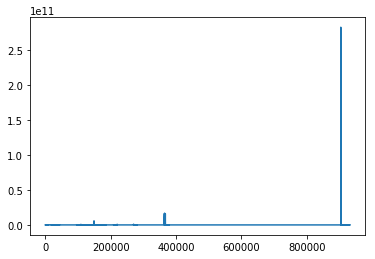

In [0]:
plt.plot(x0.ch4)

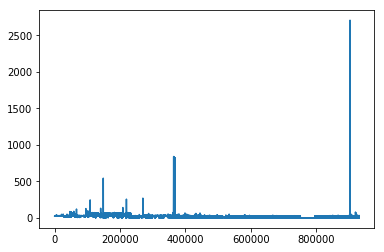

In [0]:
plt.plot(x0.h2)

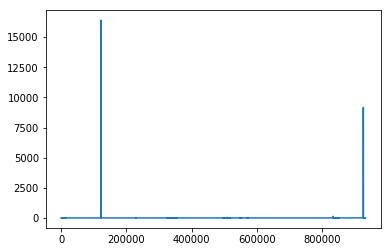

In [0]:
plt.plot(x0.no2)

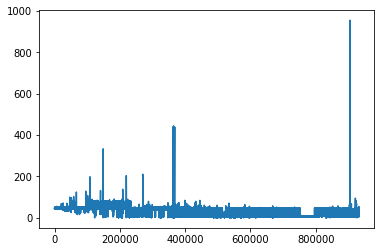

In [0]:
plt.plot(x0.co)

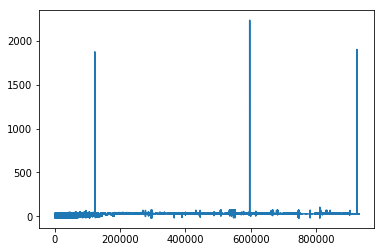

In [0]:
plt.plot(x0.so2_tmp)

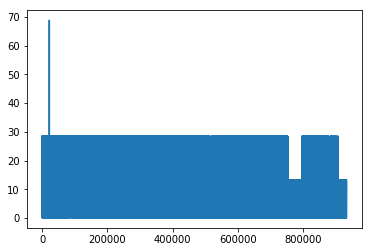

In [0]:
plt.plot(x0.latitude)

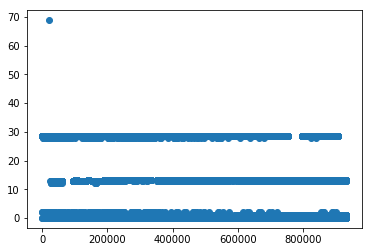

In [0]:
plt.scatter(x0.index,x0.latitude)

In [0]:
import tensorflow as tf
import keras
import keras.layers as layers

Using TensorFlow backend.


In [0]:

model2 = keras.Sequential([
    
    layers.Dense(64, input_shape=(32,)),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(0.10),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(12, activation=tf.nn.relu),
    
    layers.Dense(12, activation=tf.nn.relu),
    layers.Dense(1)
  ])

In [0]:
xtrcnn=np.reshape(xtr.values,(xtr.values.shape[0],1,xtr.values.shape[1]))
ytrcnn=np.reshape(ytr.values,(ytr.shape[0],1))

model = keras.Sequential([
    layers.LSTM(64,input_shape=(xtrcnn.shape[1],xtrcnn.shape[2])),
    layers.Dense(64, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dropout(0.10),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(32, activation=tf.nn.relu),
    layers.Dense(12, activation=tf.nn.relu),
    
    layers.Dense(12, activation=tf.nn.relu),
    layers.Dense(1)
  ])


In [0]:
model2.compile(loss='mean_squared_error',
                optimizer='adam',
                metrics=['mean_absolute_error', 'mean_squared_error'])

model2.fit(tr_x.values, tr_y, epochs=5)

W0824 17:31:25.191432 140629040215936 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/5
103756/103756 [==============================] - 9s 83us/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan
Epoch 2/5
103756/103756 [==============================] - 7s 72us/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan
Epoch 3/5
103756/103756 [==============================] - 9s 87us/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan
Epoch 4/5
103756/103756 [==============================] - 9s 91us/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan
Epoch 5/5
103756/103756 [==============================] - 10s 96us/step - loss: nan - mean_absolute_error: nan - mean_squared_error: nan


In [0]:
model2.save('model.h5')

In [0]:
keras_file= "model.h5"
# tf.keras.models.save_model(model, keras_file)

# Convert to TensorFlow Lite model.
converter = tf.lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("android_model.tflite", "wb").write(tflite_model)

29944

In [0]:
from sklearn.preprocessing import Imputer

In [0]:
im=Imputer(strategy='most_frequent')

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [0]:
dftr.latitude=dftr.latitude.replace(0, np.NaN)
dftr.longitude=dftr.longitude.replace(0, np.NaN)

In [0]:
dftr.loc['S9','latitude']=13.088279
dftr.loc['S9','longitude']=80.181568

/usr/local/lib/python3.6/dist-packages/ipykernel/kernelbase.py:399: PerformanceWarning: indexing past lexsort depth may impact performance.
  user_expressions, allow_stdin)


In [0]:
dftr.drop('nso',axis=1,inplace=True)

In [0]:
dftr.drop('ewo',axis=1,inplace=True)

In [0]:
dftr.drop('timestamp',axis=1,inplace=True)

In [0]:
# dftr=pd.get_dummies(dftr)

In [0]:
tr=im.fit_transform(dftr)

In [0]:
tr=pd.DataFrame(tr)
tr.columns=dftr.columns

In [0]:
tr.head()

,S.no,latitude,longitude,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm25,pm10,pressure,draft,air_temp,air_speed
0,1.0,28.4578,77.034,41.0,33.2,93.79,0.01,259.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1438.10,1060.04,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,62.0,75.0,86.0,0.0,0.0,0.0,0.0
1,2.0,28.4579,77.034,95.0,33.5,138.48,0.02,261.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1251.97,-5847.98,10.28,50.04,0.30,34210.0,12876.70,5163570.0,30.04,39.99,62.0,77.0,92.0,0.0,0.0,0.0,0.0
2,3.0,28.4579,77.034,0.0,0.0,0.00,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1600.45,633.37,8.28,42.87,0.21,24696.4,9764.37,2912570.0,23.72,32.62,51.0,67.0,82.0,0.0,0.0,0.0,0.0
3,4.0,28.4578,77.034,41.0,33.3,94.09,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1481.75,956.74,6.39,46.70,0.19,16722.5,7012.37,3997190.0,27.03,36.51,63.0,76.0,85.0,0.0,0.0,0.0,0.0
4,5.0,28.4579,77.034,95.0,33.5,138.48,0.02,260.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-17.0,1252.81,-5809.86,10.28,50.29,0.30,34210.0,12876.70,5258110.0,30.26,40.25,61.0,77.0,95.0,0.0,0.0,0.0,0.0


In [0]:
tr.drop('S.no',axis=1,inplace=True)

In [0]:
tr=tr[tr.temperature<100]

In [0]:
tr=tr[tr.no2<500]

In [0]:
tr=tr[tr.nh3<1000]

In [0]:
tr=tr[tr.humidity<200]

In [0]:
tr=tr[tr.h2<1000]

In [0]:
tr=tr[tr.so2_tmp<100]

In [0]:
tr=tr[tr.so2_conc<10000]

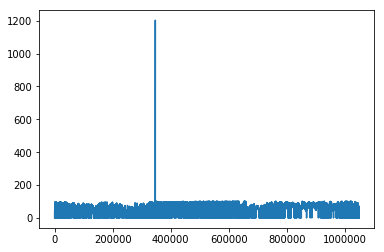

In [0]:
plt.plot(tr.humidity)

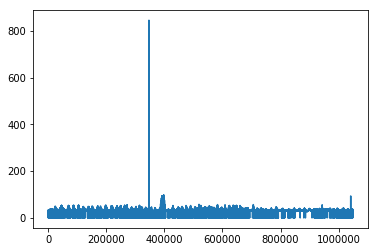

In [0]:
plt.plot(tr.temperature)

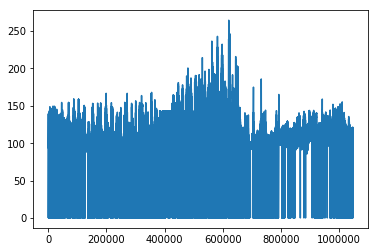

In [0]:
plt.plot(tr.heat_index)

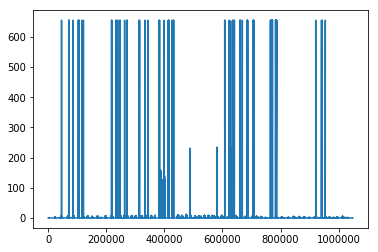

In [0]:
plt.plot(tr.uv)

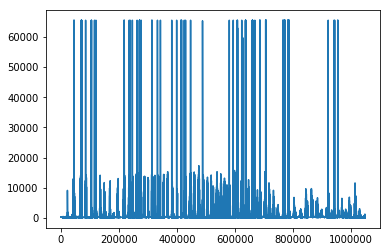

In [0]:
plt.plot(tr.ir)

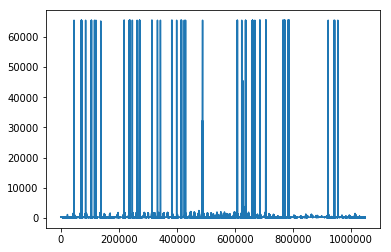

In [0]:
plt.plot(tr.luminence)

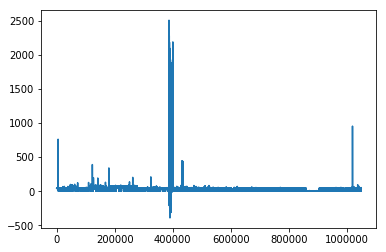

In [0]:
plt.plot(tr.co)

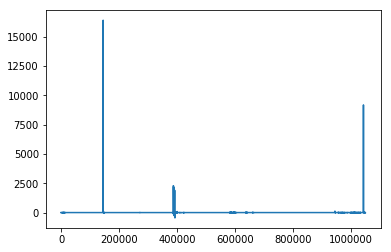

In [0]:
plt.plot(tr.no2)

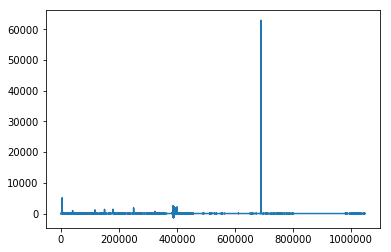

In [0]:
plt.plot(tr.nh3)

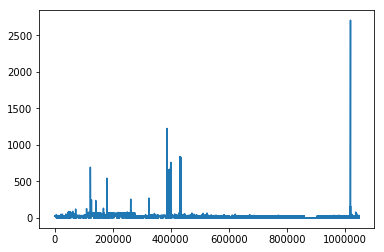

In [0]:
plt.plot(tr.h2)

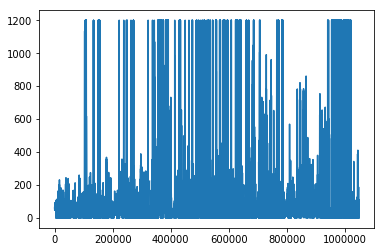

In [0]:
plt.plot(tr.pm01)

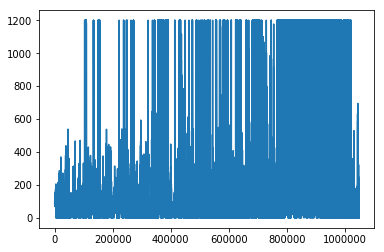

In [0]:
plt.plot(tr.pm10)

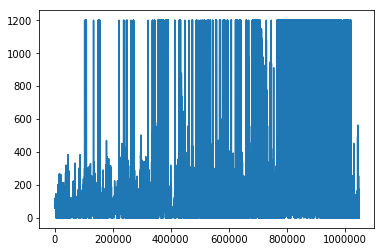

In [0]:
plt.plot(tr.pm25)

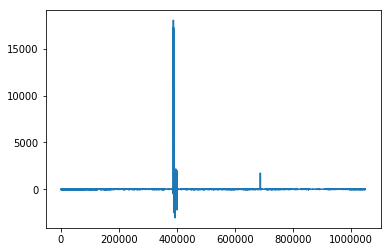

In [0]:
plt.plot(tr.so2_tmp)

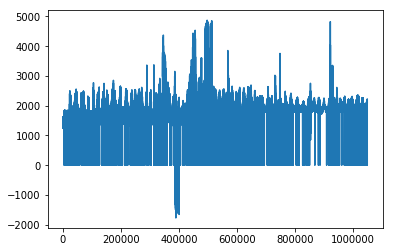

In [0]:
plt.plot(tr.so2_gas)

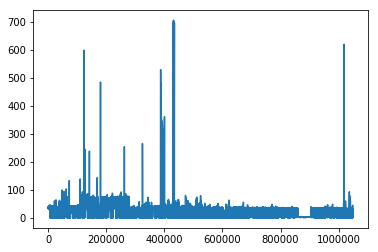

In [0]:
plt.plot(tr.c2h5o4)

In [0]:
tr[tr.c2h5o4>800]

,latitude,longitude,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm25,pm10,pressure,draft,air_temp,air_speed


In [0]:
trx=tr.drop('pm25',axis=1)

In [0]:
ytr=tr.pm25

In [0]:
ind=dftr.reset_index().svrtime[:1048023]

In [0]:
ytr.index=ind

In [0]:
trx.index=ind

In [0]:
tr_x=trx[~trx.index.duplicated(keep='first')] 
tr_y=ytr[~ytr.index.duplicated(keep='first')]


In [0]:
pip install pyramid-arima

In [0]:
from pyramid.arima import auto_arima

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)
/usr/local/lib/python3.6/dist-packages/pyramid/__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a pac

In [0]:
modelar = auto_arima(tr_y, trace=True, error_action='ignore', suppress_warnings=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1458364.547, BIC=1458421.845, Fit time=51.222 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1516589.652, BIC=1516608.751, Fit time=2.344 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 0, 0, 1); AIC=1492417.893, BIC=1492446.542, Fit time=2.910 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1459452.402, BIC=1459481.051, Fit time=25.126 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1458329.615, BIC=1458377.364, Fit time=83.126 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 0, 0, 1); AIC=1458363.579, BIC=1458401.778, Fit time=42.012 seconds
Fit ARIMA: order=(1, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1458331.079, BIC=1458388.377, Fit time=77.635 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(0, 0, 0, 1); AIC=1458333.433, BIC=1458400.281, Fit time=104.982 seconds
Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 0, 0, 1); AIC=1458419.265, BIC=1458457.464,

In [0]:
pip install geopy

In [0]:
S1=Sector 11A, Gurugram, Haryana, 122001, India
S3=Sector 37A, Dhulkot, Gurugram, Haryana, India
S4=Sector 11A, Gurugram, Haryana, 122001, India
S5=Sector 11A, Gurugram, Haryana, 122001, India
S6=Ward 84, Zone 7 Ambattur, Chennai, Chennai district, Tamil Nadu, 600050, India
S7=Ward 84, Zone 7 Ambattur, Chennai, Chennai district, Tamil Nadu, 600050, India
S8=Arulmigu Vinaitheertha Vinayagar Temple, Ambattur Estate Rd, Ward 89, Zone 7 Ambattur, Chennai, Chennai district, Tamil Nadu, 600101, India
S9=Ambattur Estate Rd, Ward 89, Zone 7 Ambattur, Chennai, Chennai district, Tamil Nadu, 600101, India

In [0]:
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="app")
location = geolocator.reverse("28.4578	 , 77.034") 
print(location.address)


Ambattur Estate Rd, Ward 89, Zone 7 Ambattur, Chennai, Chennai district, Tamil Nadu, 600101, India


In [0]:
import seaborn as sns

In [0]:
import matplotlib.pyplot as plt

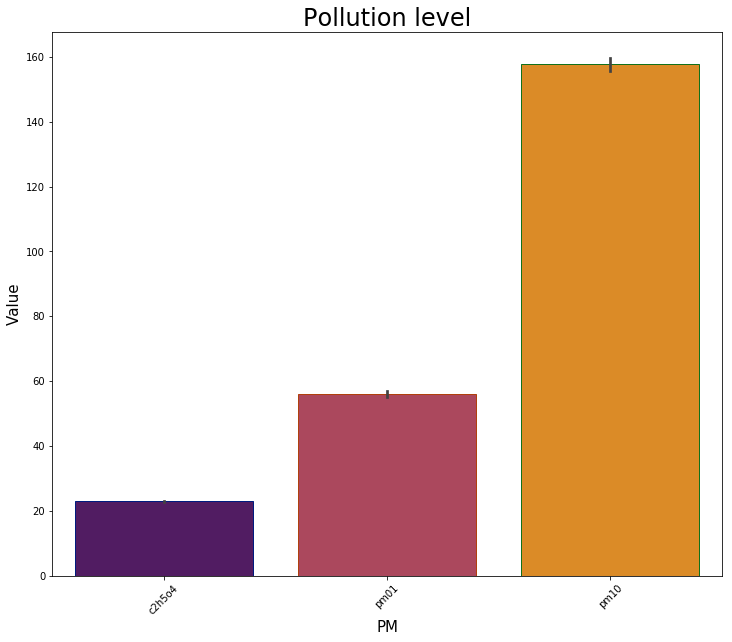

In [0]:
plt.subplots(figsize=(12,10))
sns.barplot(data=tr_x.iloc[:,25:28],palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel('PM', fontsize=15)
plt.title('Pollution level',fontsize=24)
plt.savefig('sources_per_country_count.png')
plt.show()

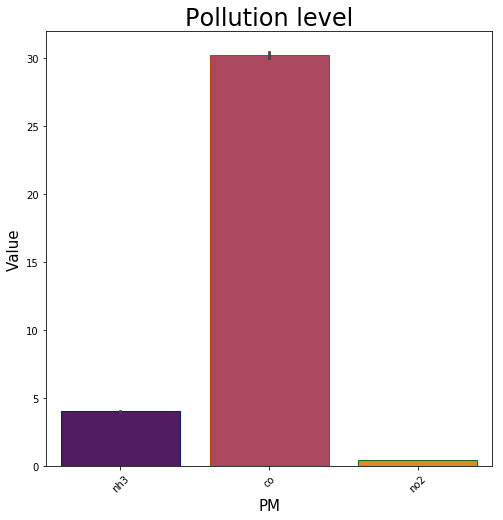

In [0]:
plt.subplots(figsize=(8,8))
sns.barplot(data=tr_x.iloc[:,18:21],palette='inferno',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Value', fontsize=15)
plt.xticks(rotation=45,fontsize=10)
plt.xlabel('PM', fontsize=15)
plt.title('Pollution level',fontsize=24)
plt.savefig('sources_per_country_count.png')
plt.show()

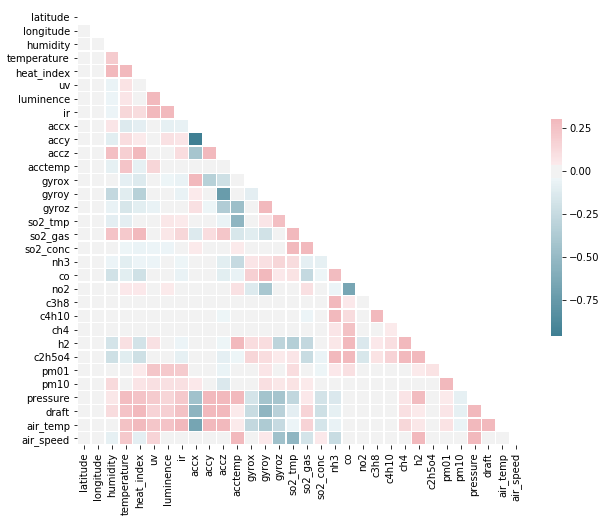

In [0]:
corr = tr_x.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(10, 8))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=False, linewidths=.5, cbar_kws={"shrink": .5});

In [165]:


import folium
map_osm = folium.Map(location=[13.088279, 80.181568],#"13.088279			 ,80.181568") 
                 
                     zoom_start=12) 

# for point in range(0, len(locationlist)):
folium.Marker([13.088279, 80.181568], popup='sta').add_to(map_osm)
folium.Marker([13.1046		 ,80.1710], popup='sta2').add_to(map_osm)
folium.Marker([13.005		 ,80.2398], popup='sta3').add_to(map_osm)
folium.Marker([13.16		 ,80.260], popup='sta4').add_to(map_osm)
folium.Polygon([[13.15		 ,80.250],[13.18		 ,80.280],[13.20		 ,80.270],[13.20		 ,80.290]])    
map_osm

In [0]:
colors = ["windows blue", "amber", "faded green", "dusty purple"]
sns.set(rc={"figure.figsize": (15,10), "axes.titlesize" : 18, "axes.labelsize" : 12, 
            "xtick.labelsize" : 14, "ytick.labelsize" : 14 })

In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

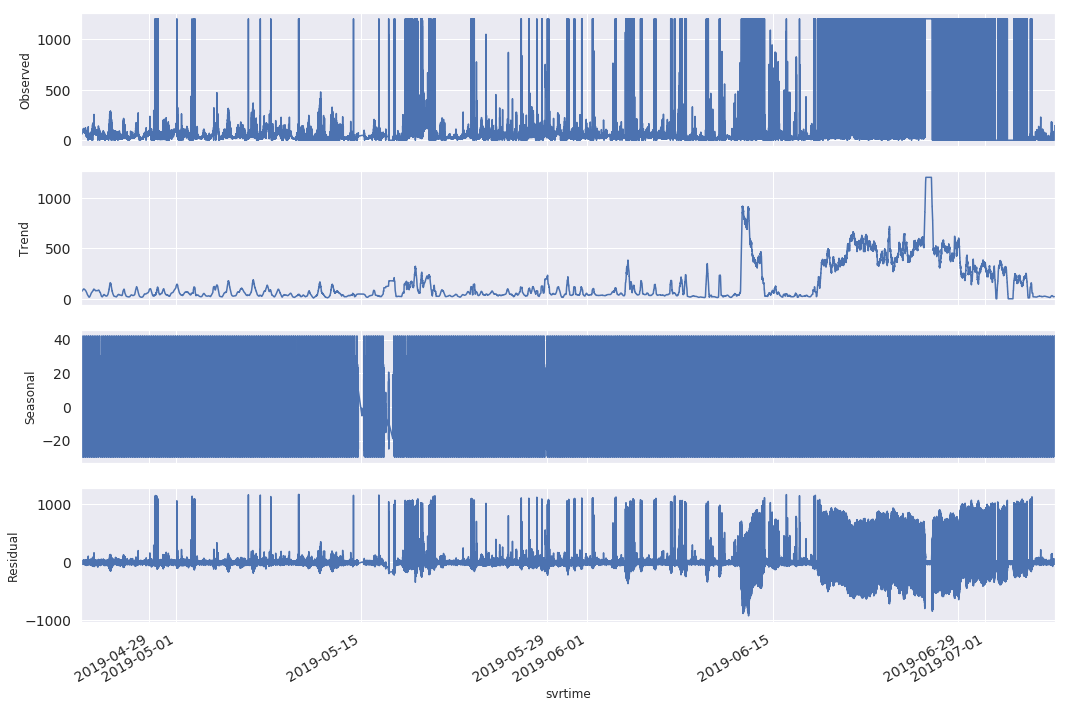

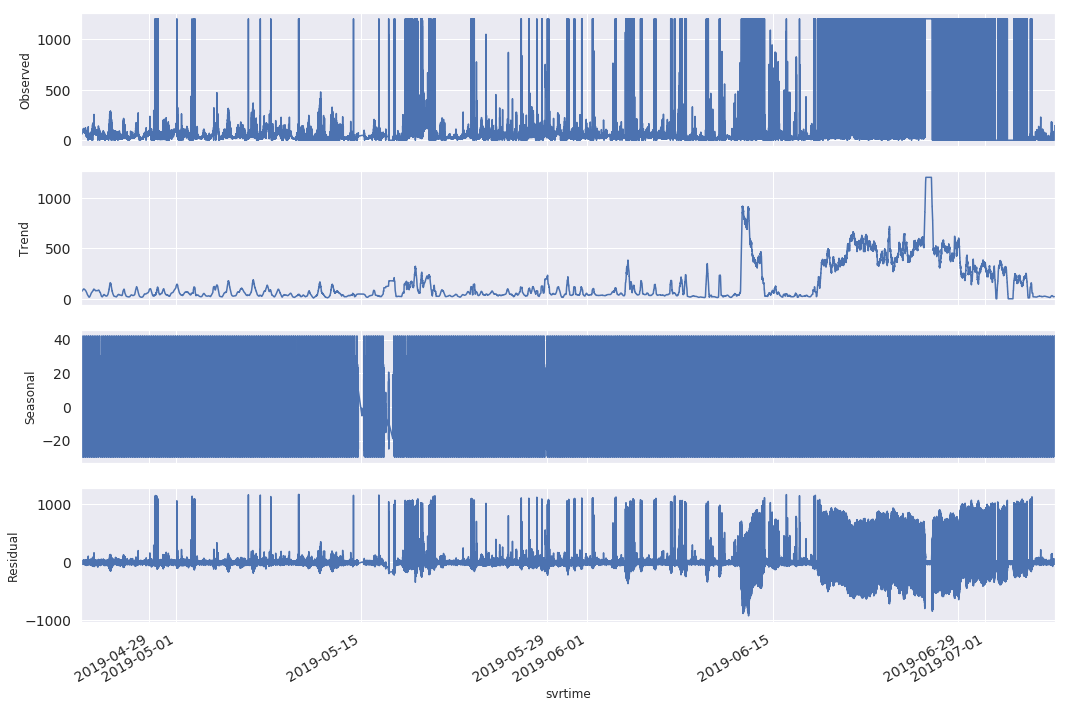

In [0]:
seasonal_decompose(tr_y, model='additive',freq=200).plot()
# print("Dickey–Fuller test: p=%f" % adfuller(tr_y)[1])

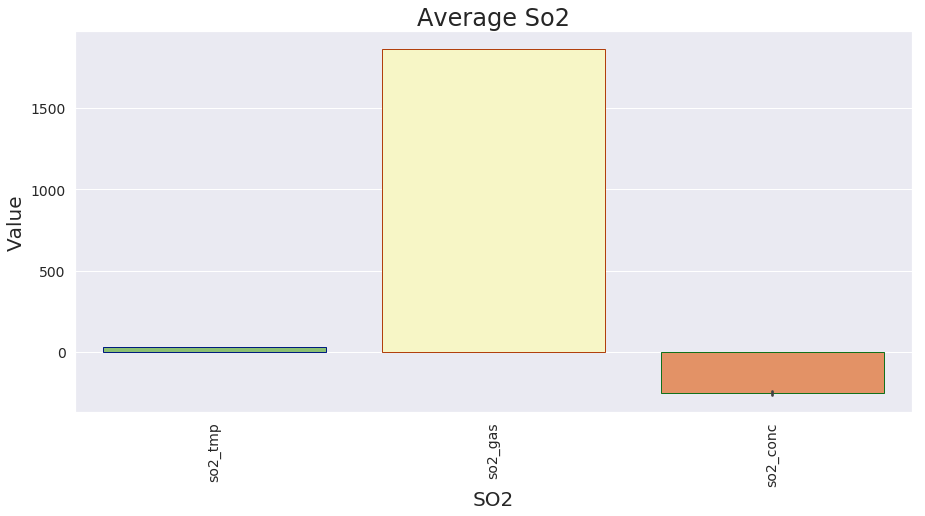

In [0]:
plt.subplots(figsize=(15,7))
sns.barplot(data=tr_x.iloc[:,15:18],palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Value', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('SO2', fontsize=20)
plt.title('Average So2', fontsize=24)
plt.show()

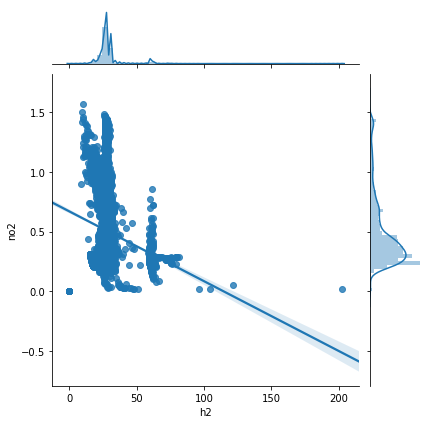

In [0]:
g = sns.jointplot("h2", "no2", data = tr_x[100:10000], kind="reg")


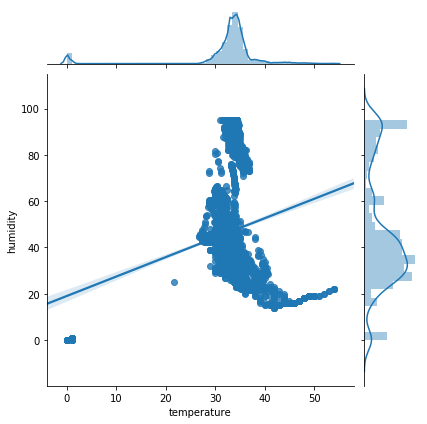

In [0]:
g = sns.jointplot("temperature", "humidity", data = tr_x[100:5000], kind="reg")

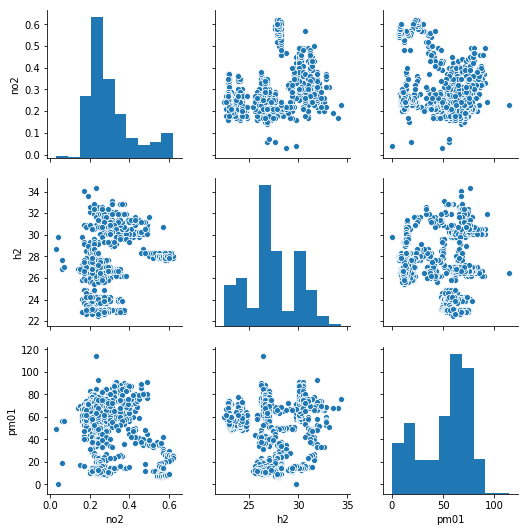

In [0]:
cols = ['no2','h2','pm01']
sns.pairplot(tr_x[cols][10:1000])

In [0]:
# dftr.loc['M1'].longitude=dftr.loc['M1'].longitude.fillna(method='ffill')
# dftr.loc['M2'].longitude=dftr.loc['M2'].longitude.fillna(method='ffill')
# dftr.loc['M3'].longitude=dftr.loc['M3'].longitude.fillna(method='ffill')
# dftr.loc['M4'].longitude=dftr.loc['M4'].longitude.fillna(method='ffill')
# dftr.loc['M5'].longitude=dftr.loc['M5'].longitude.fillna(method='ffill')
# dftr.loc['M6'].longitude=dftr.loc['M6'].longitude.fillna(method='ffill')
# dftr.loc['M7'].longitude=dftr.loc['M7'].longitude.fillna(method='ffill')

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [0]:
tr_x.head()

,latitude,longitude,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm10,pressure,draft,air_temp,air_speed
svrtime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-23 19:50:00,28.4578,77.034,41.0,33.2,93.79,0.01,259.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1438.10,1060.04,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,62.0,86.0,0.0,0.0,0.0,0.0
2019-04-23 19:51:00,28.4578,77.034,41.0,33.3,94.09,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1481.75,956.74,6.39,46.70,0.19,16722.5,7012.37,3997190.0,27.03,36.51,63.0,85.0,0.0,0.0,0.0,0.0
2019-04-23 19:52:00,28.4578,77.034,0.0,0.0,0.00,0.02,261.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1589.18,629.08,8.39,42.87,0.21,25190.8,9930.09,2912570.0,23.72,32.62,56.0,85.0,0.0,0.0,0.0,0.0
2019-04-23 19:53:00,28.4579,77.034,41.0,33.4,94.39,0.02,260.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1429.43,1094.05,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,60.0,81.0,0.0,0.0,0.0,0.0
2019-04-23 19:54:00,28.4578,77.034,41.0,33.2,93.79,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1457.79,1009.76,6.44,46.70,0.19,16892.2,7072.76,3997190.0,27.03,36.51,62.0,87.0,0.0,0.0,0.0,0.0


In [0]:
s7=dftr.loc['S7']['nh3']
s8=dftr.loc['S8']['nh3']
s9=dftr.loc['S9']['nh3']

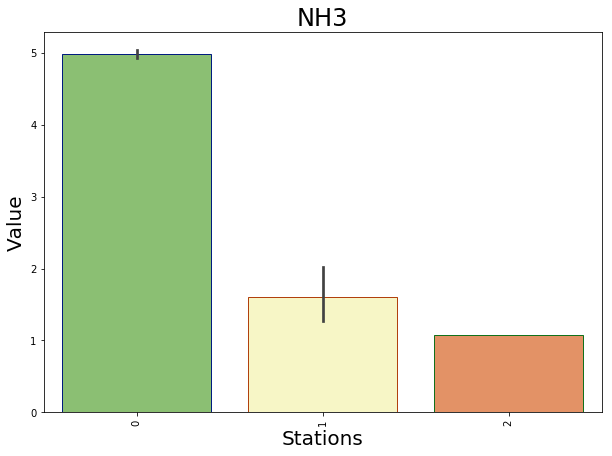

In [0]:
plt.subplots(figsize=(10,7))
sns.barplot(data=[s7,s8,s9],palette='RdYlGn_r',edgecolor=sns.color_palette('dark',7))
plt.ylabel('Value', fontsize=20)
plt.xticks(rotation=90)
plt.xlabel('Stations', fontsize=20)
plt.title('NH3',fontsize=24)
plt.show()

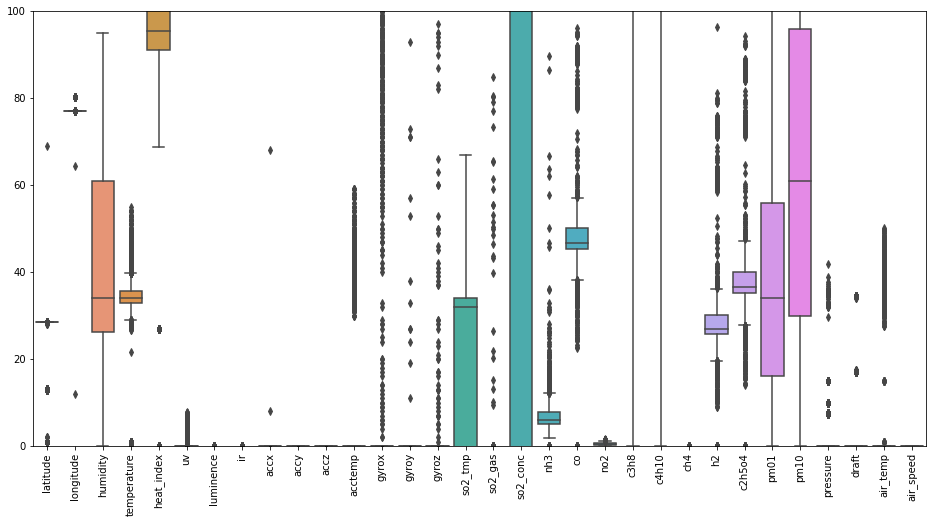

In [0]:

# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(data=tr_x[1:10000])
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

In [98]:
tr_x.head()

,latitude,longitude,humidity,temperature,heat_index,uv,luminence,ir,accx,accy,accz,acctemp,gyrox,gyroy,gyroz,so2_tmp,so2_gas,so2_conc,nh3,co,no2,c3h8,c4h10,ch4,h2,c2h5o4,pm01,pm10,pressure,draft,air_temp,air_speed
svrtime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-04-23 19:50:00,28.4578,77.034,41.0,33.2,93.79,0.01,259.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1438.10,1060.04,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,62.0,86.0,0.0,0.0,0.0,0.0
2019-04-23 19:51:00,28.4578,77.034,41.0,33.3,94.09,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1481.75,956.74,6.39,46.70,0.19,16722.5,7012.37,3997190.0,27.03,36.51,63.0,85.0,0.0,0.0,0.0,0.0
2019-04-23 19:52:00,28.4578,77.034,0.0,0.0,0.00,0.02,261.0,255.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,33.0,1589.18,629.08,8.39,42.87,0.21,25190.8,9930.09,2912570.0,23.72,32.62,56.0,85.0,0.0,0.0,0.0,0.0
2019-04-23 19:53:00,28.4579,77.034,41.0,33.4,94.39,0.02,260.0,253.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1429.43,1094.05,6.35,46.24,0.19,16554.3,6952.46,3852370.0,26.62,36.03,60.0,81.0,0.0,0.0,0.0,0.0
2019-04-23 19:54:00,28.4578,77.034,41.0,33.2,93.79,0.02,261.0,254.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,1457.79,1009.76,6.44,46.70,0.19,16892.2,7072.76,3997190.0,27.03,36.51,62.0,87.0,0.0,0.0,0.0,0.0


In [111]:
tr_x.shape

(103756, 32)

In [0]:
time=np.array([])

In [0]:
tt=tr_x.reset_index().svrtime

In [116]:
tt

0        2019-04-23 19:50:00
1        2019-04-23 19:51:00
2        2019-04-23 19:52:00
3        2019-04-23 19:53:00
4        2019-04-23 19:54:00
5        2019-04-23 19:55:00
6        2019-04-23 19:56:00
7        2019-04-23 19:57:00
8        2019-04-23 19:58:00
9        2019-04-23 19:59:00
10       2019-04-23 20:00:00
11       2019-04-23 20:01:00
12       2019-04-23 20:02:00
13       2019-04-23 20:03:00
14       2019-04-23 20:04:00
15       2019-04-23 20:05:00
16       2019-04-23 20:06:00
17       2019-04-23 20:07:00
18       2019-04-23 20:08:00
19       2019-04-23 20:09:00
20       2019-04-23 20:10:00
21       2019-04-23 20:11:00
22       2019-04-23 20:12:00
23       2019-04-23 20:13:00
24       2019-04-23 20:14:00
25       2019-04-23 20:15:00
26       2019-04-23 20:16:00
27       2019-04-23 20:17:00
28       2019-04-23 20:18:00
29       2019-04-23 20:19:00
                 ...        
103726   2019-07-06 07:12:00
103727   2019-07-06 07:13:00
103728   2019-07-06 07:14:00
103729   2019-

In [0]:
for i in range(103756):
  time=np.append(time,pd.Timestamp(tt.values[i]))

In [0]:
hour=np.array([])

In [0]:
day=np.array([])

In [0]:
for i in range(103756):
  hour=np.append(hour,time[i].hour)

In [0]:
for i in range(103756):
  day=np.append(day,time[i].dayofyear)

In [0]:
H=15*(hour-12)

In [0]:
Y=23.45*np.sin(360*(284+day)/365)

In [0]:
X=tr_x.latitude

In [0]:
# H:hour angle
# Z:Zenith angle
# X: latitude
# Y: solar declination angle
# SI: solar intensity

In [0]:
Z=np.sin(X)*np.sin(Y)+np.cos(X)*np.cos(Y)*np.cos(H)

In [0]:
SI=1000*np.cos(Z)

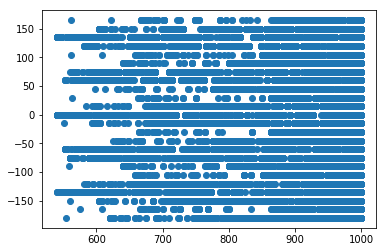

In [144]:
plt.scatter(SI,H)

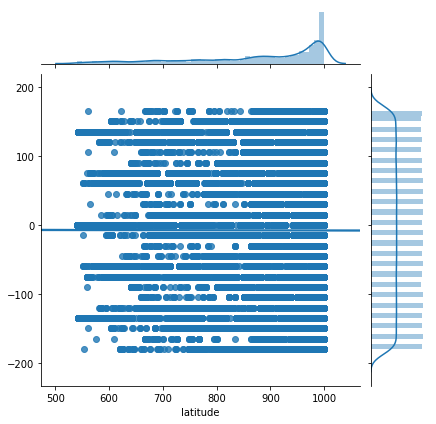

In [145]:
g = sns.jointplot(SI,H, kind="reg")

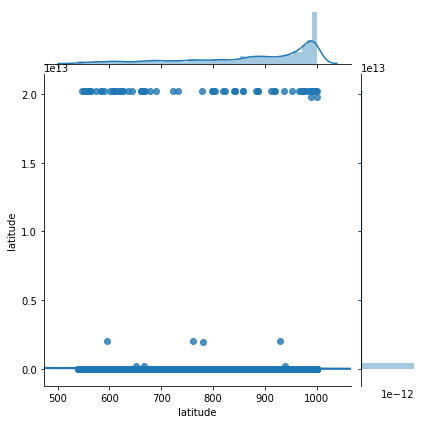

In [146]:
g = sns.jointplot(SI,tr_x.latitude, kind="reg")

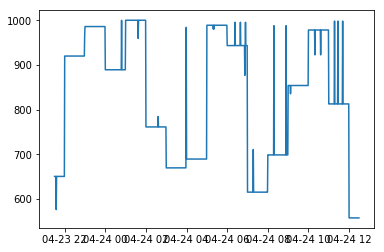

In [150]:
g = plt.plot(tt[100:1000],SI[100:1000])

In [0]:
import statsmodels.api as sm

In [154]:
tsmodel=sm.tsa.statespace.SARIMAX(tr_y,exog=tr_x.values,order=(1,1,2),seasonal_order=(0,0,0,0))

ts=tsmodel.fit()

ts.predict(tr_y.index.values[0],tr_y.index.values[0],exog=tr_x.iloc[0].values)

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


svrtime
2019-04-23 19:50:00    79.867494
dtype: float64

In [161]:
ts.forecast(1000,exog=tr_x.iloc[0:1000])

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


103756     82.868015
103757     81.647257
103758     85.173026
103759     77.859754
103760     83.802575
103761     85.050949
103762     82.121770
103763     78.924566
103764     81.975549
103765     80.872617
103766     83.857704
103767     78.868240
103768     79.906885
103769     82.240565
103770     86.244867
103771     80.862700
103772     85.853881
103773     83.768397
103774     86.925908
103775     84.771522
103776     87.865901
103777     86.279449
103778     84.202286
103779     83.897736
103780    112.236245
103781     81.880382
103782     82.878786
103783     76.225643
103784     83.071536
103785     78.805351
             ...    
104726     18.036850
104727     18.144769
104728     15.923333
104729     13.970669
104730     19.918979
104731     13.923520
104732     14.703470
104733     16.990564
104734     18.220422
104735     19.946078
104736     18.948097
104737     20.259201
104738     15.841736
104739     18.804820
104740     17.790589
104741     17.983454
104742     15

In [0]:
def generateBaseMap(default_location=[13.088279, 80.181568], default_zoom_start=12):
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [0]:
base_map=generateBaseMap()

In [199]:
from folium.plugins import HeatMap
base_map = generateBaseMap()
HeatMap(data=tr_x[['latitude', 'longitude', 'temperature']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map)


In [200]:
base_map

In [0]:
base_map_p01 = generateBaseMap()


In [300]:
HeatMap(data=tr_x[['latitude', 'longitude', 'pm01']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_p01)


In [301]:
base_map_p01

In [0]:
base_map_p25 = generateBaseMap()


In [296]:
# base_map_no2 = generateBaseMap()
HeatMap(data=tr_x[['latitude', 'longitude', 'pm10']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_p25)


In [298]:
base_map_p25

In [0]:
base_map_so2_gas = generateBaseMap()


In [230]:
# base_map_no2 = generateBaseMap()
HeatMap(data=tr_x[['latitude', 'longitude', 'so2_gas']].groupby(['latitude', 'longitude']).sum().reset_index().values.tolist(), radius=8, max_zoom=13).add_to(base_map_so2_gas)


In [231]:
base_map_so2_gas

NameError: ignored

In [0]:
dfro=dftr.loc[:,["accx","accy","accz","acctemp","gyrox","gyroy","gyroz"]]

In [0]:
dfm1=dfro.loc['M1']

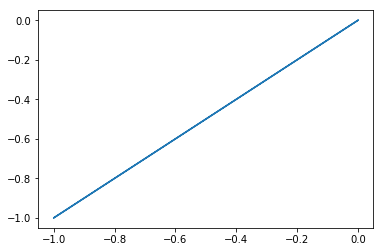

In [19]:
plt.plot(dfro.accx[1:10000],dfro.gyrox[1:10000])

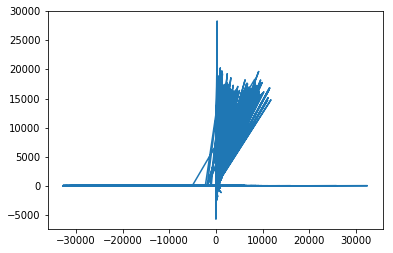

In [21]:
plt.plot(dfro.accx,dfro.acctemp)

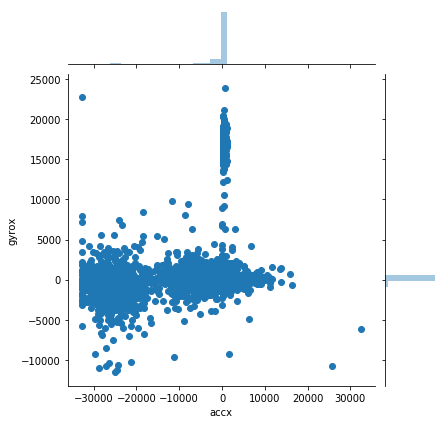

In [32]:
sns.jointplot(dfro.accx,dfro.gyrox)

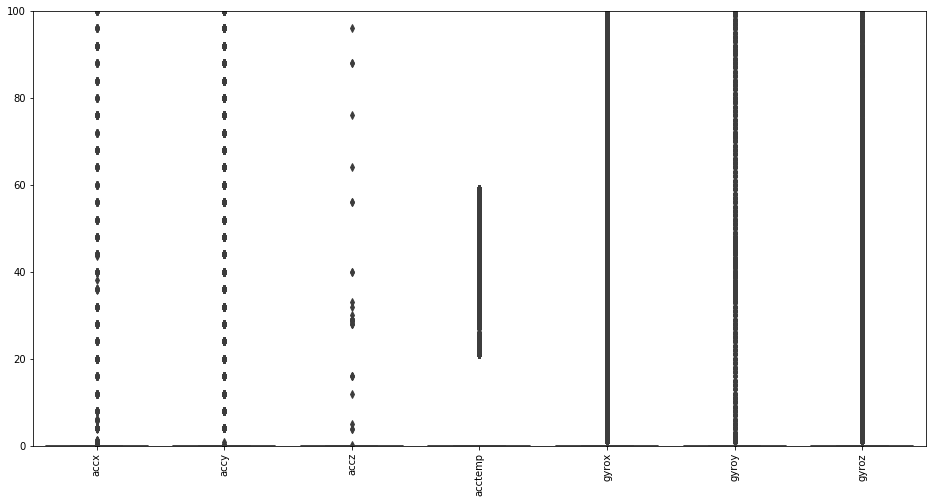

In [28]:

# data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(data=dfro)
fig.axis(ymin=0, ymax=100);
plt.xticks(rotation=90);

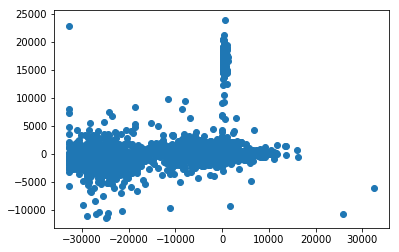

In [29]:
plt.scatter(dfro.accx,dfro.gyrox)

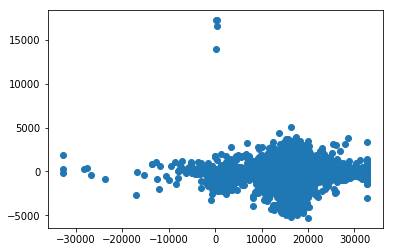

In [30]:
plt.scatter(dfro.accz,dfro.gyroz)